In [85]:
ENV["COLUMNS"] = 1000
ENV["LINES"] = 1000

using ModelingToolkit, DifferentialEquations, Random, Distributions, Plots, CSV, OrdinaryDiffEq, Turing, DataFrames, Symbolics, Serialization
using NaNMath; nm=NaNMath
using StatsPlots; sp=StatsPlots
using Plots.PlotMeasures

In [17]:
df_model1_post = DataFrame(CSV.File("Model1_ss_dataframe_post.CSV"));
df_model2_post = DataFrame(CSV.File("Model2_ss_dataframe_post.CSV"));
df_model3_post = DataFrame(CSV.File("Model3_ss_dataframe_post.CSV"));

In [18]:
fdp_wt = [exp(-7.261+log(1000)), 0.281];
fdp_zela = [exp(-4.856+log(1000)), 0.239];

f6p_wt_val = [exp(-7.760+log(1000)), 0.314];
f6p_zela_val = [exp(-7.594+log(1000)), 0.311];

PFK_flux_wt = [0.1333*1000,	0.0028*10^3];
PFK_flux_zela = [0.0801*1000, 0.0035*10^3];

In [19]:
function llik_conc(meas, mean, sd)
    return log(1/(meas*sqrt(2*pi*sd^2))) - (log(meas)-log(mean))^2/(2*sd^2)
end
 
function llik_flux(meas, mean, sd)
    return log(1/(sqrt(2*pi*sd^2))) - (meas-mean)^2/(2*sd^2)
end

llik_flux (generic function with 1 method)

In [20]:
log_lik_f6p_wt_model1 = round(llik_conc(f6p_wt_val[1], mean(df_model1_post[!,:f6p_wt]), f6p_wt_val[2]); digits = 3)
log_lik_f16bp_wt_model1 = round(llik_conc(fdp_wt[1], mean(df_model1_post[!,:f16bp_wt]), fdp_wt[2]); digits = 3)
println("Ll_f6p_wt_model1 = ", log_lik_f6p_wt_model1)
println("Ll_f16bp_wt_model1 = ", log_lik_f16bp_wt_model1)

log_lik_f6p_wt_model2 = round(llik_conc(f6p_wt_val[1], mean(df_model2_post[!,:f6p_wt]), f6p_wt_val[2]); digits = 3)
log_lik_f16bp_wt_model2 = round(llik_conc(fdp_wt[1], mean(df_model2_post[!,:f16bp_wt]), fdp_wt[2]); digits = 3)
println("Ll_f6p_wt_model2 = ", log_lik_f6p_wt_model2)
println("Ll_f16bp_wt_model2 = ", log_lik_f16bp_wt_model2)

log_lik_f6p_wt_model3 = round(llik_conc(f6p_wt_val[1], mean(df_model3_post[!,:f6p_wt]), f6p_wt_val[2]); digits = 3)
log_lik_f16bp_wt_model3 = round(llik_conc(fdp_wt[1], mean(df_model3_post[!,:f16bp_wt]), fdp_wt[2]); digits = 3)
println("Ll_f6p_wt_model3 = ", log_lik_f6p_wt_model3)
println("Ll_f16bp_wt_model3 = ", log_lik_f16bp_wt_model3)

Ll_f6p_wt_model1 = -29.764
Ll_f16bp_wt_model1 = -15.882
Ll_f6p_wt_model2 = -24.76
Ll_f16bp_wt_model2 = -9.494
Ll_f6p_wt_model3 = -22.84
Ll_f16bp_wt_model3 = -14.313


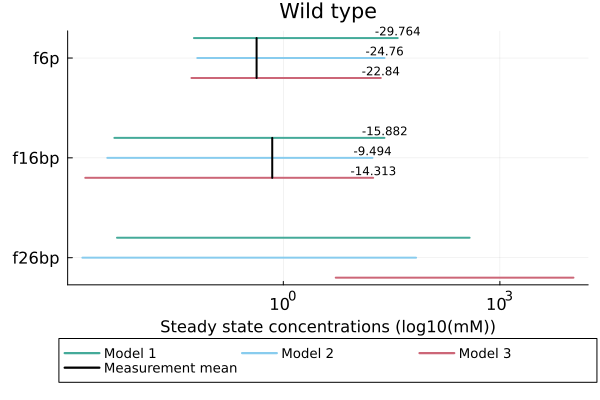

In [133]:
space=0.2
space_text=0.07
sp.plot([sp.quantile!(df_model1_post[!,:f6p_wt], [0.025,0.975])], [3+space,3+space], linewidth=2, linecolor=colorant"#44AA99", label="Model 1", primary=true)
sp.plot!([sp.quantile!(df_model1_post[!,:f16bp_wt], [0.025,0.975])], [2+space,2+space], linecolor=colorant"#44AA99", linewidth=2, primary=false)
sp.plot!([sp.quantile!(df_model1_post[!,:f26bp_wt], [0.025,0.975])], [1+space,1+space], linecolor=colorant"#44AA99", linewidth=2, primary=false)

sp.plot!([sp.quantile!(df_model2_post[!,:f6p_wt], [0.025,0.975])], [3,3], linecolor=colorant"#88CCEE", linewidth=2, label="Model 2", primary=true)
sp.plot!([sp.quantile!(df_model2_post[!,:f16bp_wt], [0.025,0.975])], [2,2], linecolor=colorant"#88CCEE", linewidth=2,label="Model 2", primary=false)
sp.plot!([sp.quantile!(df_model2_post[!,:f26bp_wt], [0.025,0.975])], [1,1], linecolor=colorant"#88CCEE", linewidth=2, label="Model 2", primary=false)

sp.plot!([sp.quantile!(df_model3_post[!,:f6p_wt], [0.025,0.975])], [3-space,3-space], linecolor=colorant"#CC6677", linewidth=2, label="Model 3", primary=true)
sp.plot!([sp.quantile!(df_model3_post[!,:f16bp_wt], [0.025,0.975])], [2-space,2-space], linecolor=colorant"#CC6677", linewidth=2, label="Model 3", primary=false)
sp.plot!([sp.quantile!(df_model3_post[!,:f26bp_wt], [0.025,0.975])], [1-space,1-space], linecolor=colorant"#CC6677", linewidth=2, label="Model 3", primary=false)

sp.plot!([f6p_wt_val[1],f6p_wt_val[1]], [3-space, 3+space], linecolor=:black, linewidth=2, label = "Measurement mean", primary=true)
sp.plot!([fdp_wt[1],fdp_wt[1]], [2-space, 2+space], linecolor=:black, linewidth=2, label = "Measurement mean", primary=false)

yticks!([1,2,3], ["f26bp", "f16bp", "f6p"])
xpos = [sp.quantile!(df_model1_post[!,:f6p_wt], 0.975), sp.quantile!(df_model1_post[!,:f16bp_wt], 0.975),sp.quantile!(df_model2_post[!,:f6p_wt], 0.975), sp.quantile!(df_model2_post[!,:f16bp_wt], 0.975),sp.quantile!(df_model3_post[!,:f6p_wt], 0.975), sp.quantile!(df_model3_post[!,:f16bp_wt], 0.975)]
ypos = [3+space+space_text, 2+space+space_text, 3+space_text, 2+space_text, 3-space+space_text, 2-space+space_text]
txt = [log_lik_f6p_wt_model1, log_lik_f16bp_wt_model1, log_lik_f6p_wt_model2, log_lik_f16bp_wt_model2, log_lik_f6p_wt_model3, log_lik_f16bp_wt_model3]
annotate!(xpos, ypos, text.(txt, 8))
plt_post_wt = plot!(legend=:outerbottom, legendcolumns=3, legendrows=2, bottommargin=-30px, xlabel="Steady state concentrations (log10(mM))", title="Wild type", xscale = :log10, ytickfontsize=11, xtickfontsize=11, legendfontsize=9)
savefig(plt_post_wt, "Figs\\Post_wt_log.png") 
plt_post_wt


In [22]:
log_lik_f6p_zela_model1 = round(llik_conc(f6p_zela_val[1], mean(df_model1_post[!,:f6p_zela]), f6p_zela_val[2]); digits = 3)
log_lik_f16bp_zela_model1 = round(llik_conc(fdp_zela[1], mean(df_model1_post[!,:f16bp_zela]), fdp_zela[2]); digits = 3)
println("Ll_f6p_zela_model1 = ", log_lik_f6p_zela_model1)
println("Ll_f16bp_zela_model1 = ", log_lik_f16bp_zela_model1)

log_lik_f6p_zela_model2 = round(llik_conc(f6p_zela_val[1], mean(df_model2_post[!,:f6p_zela]), f6p_zela_val[2]); digits = 3)
log_lik_f16bp_zela_model2 = round(llik_conc(fdp_zela[1], mean(df_model2_post[!,:f16bp_zela]), fdp_zela[2]); digits = 3)
println("Ll_f6p_zela_model2 = ", log_lik_f6p_zela_model2)
println("Ll_f16bp_zela_model2 = ", log_lik_f16bp_zela_model2)

log_lik_f6p_zela_model3 = round(llik_conc(f6p_zela_val[1], mean(df_model3_post[!,:f6p_zela]), f6p_zela_val[2]); digits = 3)
log_lik_f16bp_zela_model3 = round(llik_conc(fdp_zela[1], mean(df_model3_post[!,:f16bp_zela]), fdp_zela[2]); digits = 3)
println("Ll_f6p_zela_model3 = ", log_lik_f6p_zela_model3)
println("Ll_f16bp_zela_model3 = ", log_lik_f16bp_zela_model3)


Ll_f6p_zela_model1 = -32.542
Ll_f16bp_zela_model1 = -12.764
Ll_f6p_zela_model2 = -26.65
Ll_f16bp_zela_model2 = -11.155
Ll_f6p_zela_model3 = -18.731
Ll_f16bp_zela_model3 = -14.285


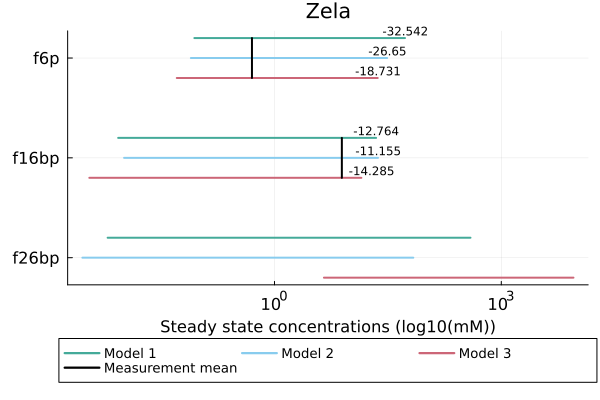

In [134]:
sp.plot([sp.quantile!(df_model1_post[!,:f6p_zela], [0.025,0.975])], [3+space,3+space], linewidth=2, linecolor=colorant"#44AA99", label="Model 1", primary=true)
sp.plot!([sp.quantile!(df_model1_post[!,:f16bp_zela], [0.025,0.975])], [2+space,2+space], linewidth=2, linecolor=colorant"#44AA99", label="Model 1", primary=false)
sp.plot!([sp.quantile!(df_model1_post[!,:f26bp_zela], [0.025,0.975])], [1+space,1+space], linewidth=2, linecolor=colorant"#44AA99", primary=false)

sp.plot!([sp.quantile!(df_model2_post[!,:f6p_zela], [0.025,0.975])], [3,3], linewidth=2, linecolor=colorant"#88CCEE", label="Model 2", primary=true)
sp.plot!([sp.quantile!(df_model2_post[!,:f16bp_zela], [0.025,0.975])], [2,2], linewidth=2, linecolor=colorant"#88CCEE", label="Model 2", primary=false)
sp.plot!([sp.quantile!(df_model2_post[!,:f26bp_zela], [0.025,0.975])], [1,1], linewidth=2, linecolor=colorant"#88CCEE", label="Model 2", primary=false)

sp.plot!([sp.quantile!(df_model3_post[!,:f6p_zela], [0.025,0.975])], [3-space,3-space], linewidth=2, linecolor=colorant"#CC6677", label="Model 3", primary=true)
sp.plot!([sp.quantile!(df_model3_post[!,:f16bp_zela], [0.025,0.975])], [2-space,2-space], linewidth=2, linecolor=colorant"#CC6677", label="Model 3", primary=false)
sp.plot!([sp.quantile!(df_model3_post[!,:f26bp_zela], [0.025,0.975])], [1-space,1-space], linewidth=2, linecolor=colorant"#CC6677", label="Model 3", primary=false)

sp.plot!([f6p_zela_val[1],f6p_zela_val[1]], [3-space, 3+space], linewidth=2, linecolor=:black, label = "Measurement mean")
sp.plot!([fdp_zela[1],fdp_zela[1]], [2-space, 2+space], linewidth=2, linecolor=:black, label = "Measurement mean", primary=false)

yticks!([1,2,3], ["f26bp", "f16bp", "f6p"])
xpos = [sp.quantile!(df_model1_post[!,:f6p_zela], 0.975), sp.quantile!(df_model1_post[!,:f16bp_zela], 0.975),sp.quantile!(df_model2_post[!,:f6p_zela], 0.975), sp.quantile!(df_model2_post[!,:f16bp_zela], 0.975),sp.quantile!(df_model3_post[!,:f6p_zela], 0.975), sp.quantile!(df_model3_post[!,:f16bp_zela], 0.975)+5]
ypos = [3+space+space_text, 2+space+space_text, 3+space_text, 2+space_text, 3-space+space_text, 2-space+space_text]
txt = [log_lik_f6p_zela_model1, log_lik_f16bp_zela_model1, log_lik_f6p_zela_model2, log_lik_f16bp_zela_model2, log_lik_f6p_zela_model3, log_lik_f16bp_zela_model3]
annotate!(xpos, ypos, text.(txt, 8))
plt_post_zela = plot!(legend=:outerbottom, legendcolumns=3, legendrows=2, bottommargin=-30px, xlabel="Steady state concentrations (log10(mM))", title="Zela", xscale = :log10, ytickfontsize=11, xtickfontsize=11, legendfontsize=9)
savefig(plt_post_zela, "Figs\\Post_zela_log.png") 
plt_post_zela


In [24]:
log_lik_PFKMflux_wt_model1 = round(llik_flux(PFK_flux_wt[1], mean(df_model1_post[!,:PFKM_flux_wt]), PFK_flux_wt[2]); digits = 3)
log_lik_PFKMflux_zela_model1 = round(llik_flux(PFK_flux_zela[1], mean(df_model1_post[!,:PFKM_flux_zela]), PFK_flux_zela[2]); digits = 3)
println("Ll PFKM flux wt model1 = ", log_lik_PFKMflux_wt_model1)
println("Ll PFKM flux zela model1 = ", log_lik_PFKMflux_zela_model1)

log_lik_PFKMflux_wt_model2 = round(llik_flux(PFK_flux_wt[1], mean(df_model2_post[!,:PFKM_flux_wt]), PFK_flux_wt[2]); digits = 3)
log_lik_PFKMflux_zela_model2 = round(llik_flux(PFK_flux_zela[1], mean(df_model2_post[!,:PFKM_flux_zela]), PFK_flux_zela[2]); digits = 3)
println("Ll PFKM flux wt model2 = ", log_lik_PFKMflux_wt_model2)
println("Ll PFKM flux zela model2 = ", log_lik_PFKMflux_zela_model2)

log_lik_PFKMflux_wt_model3 = round(llik_flux(PFK_flux_wt[1], mean(df_model3_post[!,:PFKM_flux_wt]), PFK_flux_wt[2]); digits = 3)
log_lik_PFKMflux_zela_model3 = round(llik_flux(PFK_flux_zela[1], mean(df_model3_post[!,:PFKM_flux_zela]), PFK_flux_zela[2]); digits = 3)
println("Ll PFKM flux wt model3 = ", log_lik_PFKMflux_wt_model3)
println("Ll PFKM flux zela model3 = ", log_lik_PFKMflux_zela_model3)

Ll PFKM flux wt model1 = -50.414
Ll PFKM flux zela model1 = -265.539
Ll PFKM flux wt model2 = -14.512
Ll PFKM flux zela model2 = -409.445
Ll PFKM flux wt model3 = -2.101
Ll PFKM flux zela model3 = -339.745


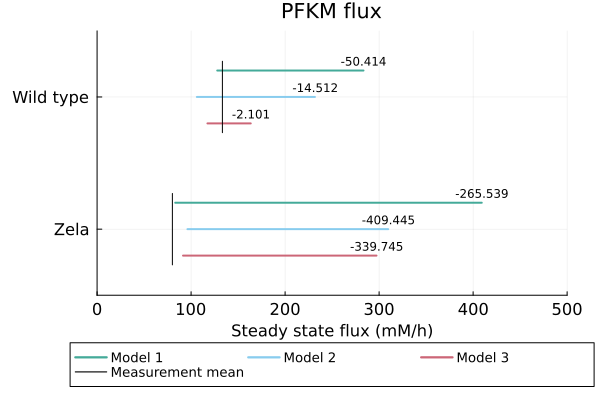

In [147]:
sp.plot([sp.quantile!(df_model1_post[!,:PFKM_flux_wt], [0.025,0.975])], [2+space,2+space], linewidth=2, linecolor=colorant"#44AA99", label="Model 1", primary=true, xlims=(0,500))
sp.plot!([sp.quantile!(df_model1_post[!,:PFKM_flux_zela], [0.025,0.975])], [1+space,1+space], linewidth=2, linecolor=colorant"#44AA99", label="Model 1", primary=false)

sp.plot!([sp.quantile!(df_model2_post[!,:PFKM_flux_wt], [0.025,0.975])], [2,2], linewidth=2, linecolor=colorant"#88CCEE", label="Model 2", primary=true)
sp.plot!([sp.quantile!(df_model2_post[!,:PFKM_flux_zela], [0.025,0.975])], [1,1], linewidth=2, linecolor=colorant"#88CCEE", label="Model 2", primary=false)

sp.plot!([sp.quantile!(df_model3_post[!,:PFKM_flux_wt], [0.025,0.975])], [2-space,2-space], linewidth=2, linecolor=colorant"#CC6677", label="Model 3", primary=true)
sp.plot!([sp.quantile!(df_model3_post[!,:PFKM_flux_zela],[0.025,0.975])], [1-space,1-space], linewidth=2, linecolor=colorant"#CC6677", label="Model 3", primary=false)

sp.plot!([PFK_flux_wt[1],PFK_flux_wt[1]], [2-space-space_text, 2+space+space_text], linecolor=:black, label = "Measurement mean")
sp.plot!([PFK_flux_zela[1],PFK_flux_zela[1]], [1-space-space_text, 1+space+space_text], linecolor=:black, primary=false)

yticks!([1,2], ["Zela", "Wild type"])
xpos = [sp.quantile!(df_model1_post[!,:PFKM_flux_wt], 0.975), sp.quantile!(df_model1_post[!,:PFKM_flux_zela], 0.975), sp.quantile!(df_model2_post[!,:PFKM_flux_wt], 0.975), sp.quantile!(df_model2_post[!,:PFKM_flux_zela], 0.975), sp.quantile!(df_model3_post[!,:PFKM_flux_wt], 0.975), sp.quantile!(df_model3_post[!,:PFKM_flux_zela], 0.975)]
ypos = [2+space+space_text, 1+space+space_text, 2+space_text, 1+space_text, 2-space+space_text, 1-space+space_text]
txt = [log_lik_PFKMflux_wt_model1, log_lik_PFKMflux_zela_model1, log_lik_PFKMflux_wt_model2, log_lik_PFKMflux_zela_model2, log_lik_PFKMflux_wt_model3, log_lik_PFKMflux_zela_model3]
annotate!(xpos, ypos, text.(txt, 8))
plt_post_flux = plot!(legend=:outerbottom, legendcolumns=3, legendrows=2, bottommargin=-30px, rightmargin=25px, xlabel="Steady state flux (mM/h)", title="PFKM flux", ylim=(0.5,2.5), ytickfontsize=11, xtickfontsize=11,legendfontsize=9)
savefig(plt_post_flux, "Figs\\Post_PFKM_flux.png") 
plt_post_flux

In [26]:
log_lik_total_model1 = log_lik_f6p_wt_model1 + log_lik_f16bp_wt_model1 + log_lik_f6p_zela_model1 + log_lik_f16bp_zela_model1 + log_lik_PFKMflux_wt_model1 + log_lik_PFKMflux_zela_model1 

-406.905

In [12]:
log_lik_total_model2 = log_lik_f6p_wt_model2 + log_lik_f16bp_wt_model2 + log_lik_f6p_zela_model2 + log_lik_f16bp_zela_model2+ log_lik_PFKMflux_wt_model2 + log_lik_PFKMflux_zela_model2

-496.01599999999996

In [13]:
log_lik_total_model3 = log_lik_f6p_wt_model3 + log_lik_f16bp_wt_model3 + log_lik_f6p_zela_model3 + log_lik_f16bp_zela_model3 + log_lik_PFKMflux_wt_model3 + log_lik_PFKMflux_zela_model3 

-412.015

In [87]:
            # mean,     sd,  hdi_3%,  hdi_97%,  mcse_mean,  mcse_sd  
g6p_wt_all = [-7.766, 0.319, -8.345, -7.139, 0.006, 0.004]
g6p_zela_all = [-7.584, 0.331, -8.205, -6.986, 0.007, 0.005]

dhap_wt_all = [-13.055, 0.165, -13.367, -12.755, 0.004, 0.003]
dhap_zela_all = [-10.965, 0.161, -11.271, -10.660, 0.003, 0.002]

atp_wt_all = [-5.647, 0.163, -5.981, -5.353, 0.003, 0.002]
atp_zela_all = [-5.676, 0.166, -5.979, -5.358, 0.003, 0.002]

adp_wt_all = [-6.619, 0.167, -6.948, -6.322, 0.003, 0.002]
adp_zela_all = [-6.774, 0.165, -7.071, -6.441, 0.003, 0.002]

amp_wt_all = [-12.142, 0.261, -12.614, -11.637, 0.005, 0.004] 
amp_zela_all = [-11.139, 0.257, -11.606, -10.624, 0.005, 0.003]

cit_wt_all = [-3.926, 0.219, -4.343, -3.510, 0.004, 0.003]
cit_zela_all = [-3.787, 0.227, -4.235, -3.382, 0.005, 0.004]

fdp_wt_all = [-7.261, 0.281, -7.794, -6.731, 0.005, 0.004] 
fdp_zela_all = [-4.856, 0.239, -5.317, -4.413, 0.005, 0.003] 
 
f6p_wt_all_val = [-7.760, 0.314, -8.323, -7.171, 0.006, 0.004]
f6p_zela_all_val = [-7.594, 0.311, -8.191, -7.027, 0.006, 0.004]

pep_wt_all = [-12.586, 0.341, -13.268, -11.942, 0.007, 0.005]
pep_zela_all = [-11.229, 0.339, -11.882, -10.601, 0.007, 0.005]

g3p_wt_all = [-9.513, 0.113, -9.733, -9.294, 0.002, 0.002]   
g3p_zela_all = [-10.174, 0.117, -10.398, -9.945, 0.002, 0.002]   

data_wt_all = [atp_wt_all adp_wt_all cit_wt_all amp_wt_all pep_wt_all g6p_wt_all g3p_wt_all dhap_wt_all f6p_wt_all_val fdp_wt_all]
data_zela_all = [atp_zela_all adp_zela_all cit_zela_all amp_zela_all pep_zela_all g6p_zela_all g3p_zela_all dhap_zela_all f6p_zela_all_val fdp_zela_all]

met_names = ["atp", "adp", "cit", "amp", "pep", "g6p", "g3p", "dhap", "f6p", "f16bp"];


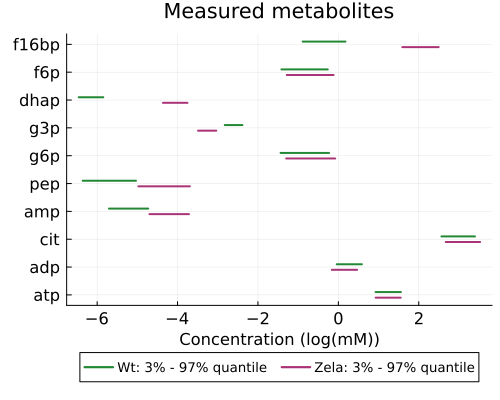

In [154]:
plt = sp.plot()
for i in 1:size(data_wt_all, 2)
    if i == 1
        sp.plot!(plt, [data_wt_all[3,i], data_wt_all[4,i]].+log(1000), [i+0.1,i+0.1], linewidth=2, label = "Wt: 3% - 97% quantile", linecolor=colorant"#228833", primary=true)
        sp.plot!(plt, [data_zela_all[3,i], data_zela_all[4,i]].+log(1000), [i-0.1,i-0.1], linewidth=2, label = "Zela: 3% - 97% quantile", linecolor=colorant"#AA3377", primary=true) 
    else
        sp.plot!(plt, [data_wt_all[3,i], data_wt_all[4,i]].+log(1000), [i+0.1,i+0.1], linewidth=2, label = "Wt", linecolor=colorant"#228833", primary=false)
        sp.plot!(plt, [data_zela_all[3,i], data_zela_all[4,i]].+log(1000), [i-0.1,i-0.1], linewidth=2, label = "Zela", linecolor=colorant"#AA3377", primary=false) 
    end
end
yticks!(plt, [1,2,3,4,5,6,7,8,9,10], ["atp", "adp", "cit", "amp", "pep", "g6p", "g3p", "dhap", "f6p", "f16bp"])
plt_meas_met = plot!(legend=:outerbottom, legendcolumns = 2, bottommargin=-30px, rightmargin=0px, xlabel="Concentration (log(mM))", title="Measured metabolites", size=(500,400), ytickfontsize=11, xtickfontsize=11, legendfontsize=9)
savefig(plt_meas_met, "Figs\\Meas_metabolites.png") 
plt_meas_met


In [102]:
# enzyme concentrations
GPI_wt = [-6.289, 0.185,  [-6.504867618939556, -6.1158805608587725]]
GPI_zela = [-5.858, 0.103, [-5.9936866938204965, -5.787172347491548]]

PFKM_wt = [-10.037, 0.165, [-10.21813768551022, -9.85316246428821]]
PFKM_zela = [-9.752, 0.216,  [-10.001129080383594, -9.52596549530122]]

AMPK_wt = [-9.764, 0.087, [-9.851568196644905, -9.67766834710375]]
AMPK_zela = [-9.595, 0.090, [-9.672925692266766, -9.479613558358295]]

ALDO_wt = [-5.653, 0.263, [-5.992292990855869, -5.435688947038484]]
ALDO_zela = [-5.322, 0.079, [-5.422441400691694, -5.2529053714457365]]

pp_flux_wt = [2*0.0044*1000, 2*8.14*10^-1] # from 10^-4 to 10^-1
pp_flux_zela = [2*0.0016*1000, 2*6.22*10^-1] # from 10^-4 to 10^-1

PFK_flux_wt = [0.1333,	0.0028, 0.1278,	0.1388].*10^3 # from 10^-4 to 10^3 [0.1278*1000,	0.1388*1000]
PFK_flux_zela = [0.0801, 0.0035, 0.0201, 0.0279].*10^3 # from 10^-4 to 10^3

flux_vec = [PFK_flux_wt PFK_flux_zela];


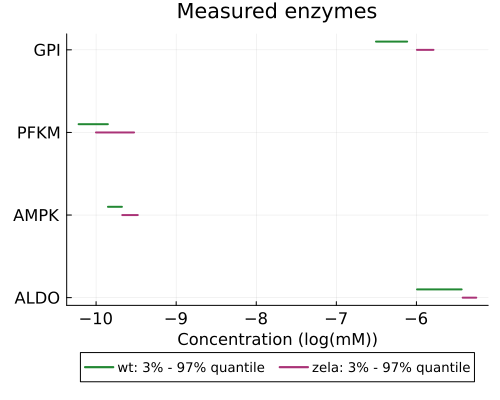

In [157]:
sp.plot(GPI_wt[3], [4+0.1,4+0.1], label = "wt: 3% - 97% quantile", linewidth=2, linecolor=colorant"#228833", primary=true)
sp.plot!(GPI_zela[3], [4,4], label = "zela: 3% - 97% quantile", linewidth=2, linecolor=colorant"#AA3377", primary=true)
sp.plot!(PFKM_wt[3], [3+0.1,3+0.1], label = "wt: 3% - 97% quantile", linewidth=2, linecolor=colorant"#228833", primary=false)
sp.plot!(PFKM_zela[3], [3,3], label = "zela: 3% - 97% quantile", linewidth=2, linecolor=colorant"#AA3377", primary=false)
sp.plot!(AMPK_wt[3], [2+0.1,2+0.1], label = "wt: 3% - 97% quantile", linewidth=2, linecolor=colorant"#228833", primary=false)
sp.plot!(AMPK_zela[3], [2,2], label = "zela: 3% - 97% quantile", linewidth=2, linecolor=colorant"#AA3377", primary=false)
sp.plot!(ALDO_wt[3], [1+0.1,1+0.1], label = "wt: 3% - 97% quantile", linewidth=2, linecolor=colorant"#228833", primary=false)
sp.plot!(ALDO_zela[3], [1,1], label = "zela: 3% - 9 % quantile", linewidth=2, linecolor=colorant"#AA3377", primary=false)
yticks!([1,2,3,4], ["ALDO", "AMPK", "PFKM", "GPI"])
plt_meas_enz = plot!(legend=:outerbottom, legendcolumns = 2, bottommargin=-30px, xlabel="Concentration (log(mM))", title="Measured enzymes", size=(500,400), ytickfontsize=11, xtickfontsize=11, legendfontsize=9)
savefig(plt_meas_enz, "Figs\\Meas_enzymes.png") 
plt_meas_enz



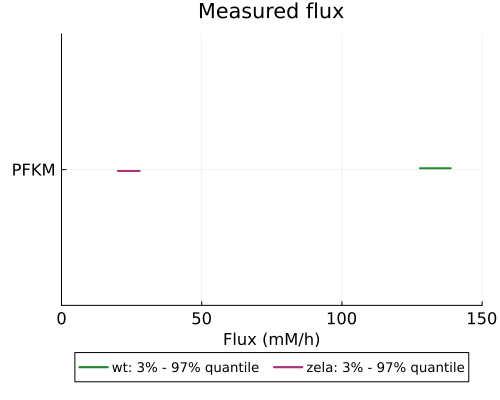

In [164]:
sp.plot([PFK_flux_wt[3], PFK_flux_wt[4]], [1+0.01,1+0.01], linewidth=2, label = "wt: 3% - 97% quantile", linecolor=colorant"#228833", primary=true)
sp.plot!([PFK_flux_zela[3], PFK_flux_zela[4]], [1-0.01,1-0.01], linewidth=2, label = "zela: 3% - 97% quantile", linecolor=colorant"#AA3377", primary=true)
yticks!([1], ["PFKM"])
plt_meas_flux = plot!(legend=:outerbottom, legendcolumns = 2, bottommargin=-30px, rightmargin=10px, xlabel="Flux (mM/h)", title="Measured flux", ylims = (0, 2), xlim=(0,150), size=(500,400), ytickfontsize=11, xtickfontsize=11, legendfontsize=9)
savefig(plt_meas_flux, "Figs\\Meas_flux.png") 
plt_meas_flux